# 이번장에서 필요한 라이브러리 불러오기

In [37]:
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

# 데이터 불러오기
* 이전의 Hierarchical Jupyter Notebook의 전처리 방법을 따름

In [38]:
utilities_df = pd.read_csv('Utilities.csv')

# set row names to the utilities column
utilities_df.set_index(keys = 'Company',inplace = True)

# while not required, the conversion of integer data to float
# will avoid a warning when applying the scale function
utilities_df = utilities_df.apply(lambda x: x.astype('float64'))

# scikit-learn uses population standard deviation
# axis 0를 따라서 Standardization
# 방법1
utilities_df_norm = utilities_df.apply(preprocessing.scale,axis = 0)

utilities_df_norm

,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
Company,,,,,,,,
Arizona,-0.300057,-0.700750,-0.426938,-0.591310,-0.538611,0.046983,-0.731447,-0.873765
Boston,-1.243092,-0.199030,0.840322,0.211704,-0.341667,-1.103127,0.810687,0.832436
Central,1.752432,2.127130,-1.371171,-0.912516,0.052220,0.085906,-0.731447,-0.082323
Commonwealth,-0.521947,0.211469,-0.004518,-0.224218,-0.965322,-0.718219,1.359271,-0.741244
NY,2.085268,-0.883194,0.591840,-1.325495,-0.735555,-1.618644,0.219434,1.732470
Florida,1.142233,1.260521,-1.420868,0.693512,-1.785921,0.638040,0.640016,0.254499
Hawaiian,0.587506,0.667579,0.169420,2.437200,-0.341667,-0.366757,-0.731447,1.010970
Idaho,-0.078166,-0.700750,1.908797,0.005214,0.019396,1.201706,-0.731447,-1.460904
Kentucky,1.253178,1.032466,-0.004518,0.785285,1.299530,-0.146480,-0.731447,-0.443073


# Kmeans 알고리즘 적용하기

In [39]:
kmeans = KMeans(n_clusters=6,random_state = 0).fit(utilities_df_norm)
kmeans

KMeans(n_clusters=6, random_state=0)

In [40]:
# Cluster membership
memb = pd.Series(kmeans.labels_,index = utilities_df_norm.index)
memb

Company
Arizona         2
Boston          1
Central         2
Commonwealth    0
NY              3
Florida         2
Hawaiian        1
Idaho           5
Kentucky        2
Madison         0
Nevada          4
New England     1
Northern        0
Oklahoma        2
Pacific         1
Puget           5
San Diego       1
Southern        2
Texas           2
Wisconsin       0
United          1
Virginia        0
dtype: int32

In [41]:
for key,item in memb.groupby(memb):
    print(key,':',','.join(item.index))

0 : Commonwealth,Madison ,Northern,Wisconsin,Virginia
1 : Boston ,Hawaiian ,New England,Pacific ,San Diego,United
2 : Arizona ,Central ,Florida ,Kentucky,Oklahoma,Southern,Texas
3 : NY
4 : Nevada
5 : Idaho,Puget


# 군집을 분석하기 위해서 군집의 중심과 반경 그리고 plot 검토

In [42]:
kmeans.cluster_centers_

array([[-0.01159883,  0.33917974,  0.22408597, -0.3664664 ,  0.17038609,
        -0.41133091,  1.60186791, -0.60946007],
       [-0.63289267, -0.6399357 ,  0.2066922 ,  1.17532051,  0.05769056,
        -0.75771898, -0.38096174,  1.20361559],
       [ 0.51618395,  0.79789576, -1.0090968 , -0.3454897 , -0.50109796,
         0.3601402 , -0.53552336, -0.42019777],
       [ 2.08526789, -0.88319419,  0.59183995, -1.32549456, -0.73555468,
        -1.61864354,  0.21943396,  1.73247023],
       [-2.01970929, -1.47613677,  0.11972335, -1.25666479,  1.06976207,
         2.4584945 , -0.73144654, -0.61608609],
       [ 0.08825197, -0.54111193,  1.99576564, -0.10950191,  0.98770222,
         1.62106805, -0.73144654, -1.17469647]])

In [43]:
# k=6인 군집화에 대한 군집 중심과 군집 내 거리
centroids = pd.DataFrame(kmeans.cluster_centers_, columns = utilities_df_norm.columns)
centroids = centroids.round(3)
centroids

,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
0,-0.012,0.339,0.224,-0.366,0.170,-0.411,1.602,-0.609
1,-0.633,-0.640,0.207,1.175,0.058,-0.758,-0.381,1.204
2,0.516,0.798,-1.009,-0.345,-0.501,0.360,-0.536,-0.420
3,2.085,-0.883,0.592,-1.325,-0.736,-1.619,0.219,1.732
4,-2.020,-1.476,0.120,-1.257,1.070,2.458,-0.731,-0.616
5,0.088,-0.541,1.996,-0.110,0.988,1.621,-0.731,-1.175


In [44]:
distances = kmeans.transform(utilities_df_norm) # 인자를 cluster-distance space 로 변환
distances

array([[2.80463747, 3.01304154, 1.91183392, 4.22015724, 3.57331973,
        3.34302792],
       [2.44255693, 1.93219549, 3.65618216, 3.94351735, 4.90542302,
        4.35004991],
       [3.89037563, 4.76270406, 2.0692265 , 4.57389571, 6.04179216,
        5.12788757],
       [1.34517427, 3.25569104, 2.74174758, 4.2244954 , 4.97920977,
        4.33573141],
       [4.0767781 , 3.98253408, 4.24098938, 0.        , 6.61302985,
        5.51143137],
       [3.55098934, 4.11511346, 2.32812062, 4.70843784, 6.14585975,
        5.40904898],
       [4.08223472, 2.29455555, 3.43434937, 4.70442327, 6.13691133,
        4.69331701],
       [3.58556579, 3.95487605, 3.65197074, 5.27683877, 3.54407112,
        1.12663163],
       [3.20565908, 3.36171535, 2.53453091, 4.59555879, 5.29702691,
        3.5201866 ],
       [1.00294168, 3.9480126 , 3.13147853, 4.14047216, 5.20104925,
        4.0689759 ],
       [4.75609101, 4.83188166, 4.54465659, 6.61302985, 0.        ,
        3.34265641],
       [3.50290484, 1

In [45]:
# finde closest cluster for each data point
minSquaredDistances = distances.min(axis=1)**2

# combine with cluster labels into a dataframe
df = pd.DataFrame({'squaredDistance':minSquaredDistances,'Cluster': kmeans.labels_},
                 index = utilities_df_norm.index)
df

,squaredDistance,Cluster
Company,,
Arizona,3.655109,2
Boston,3.733379,1
Central,4.281698,2
Commonwealth,1.809494,0
NY,0.000000,3
Florida,5.420146,2
Hawaiian,5.264985,1
Idaho,1.269299,5
Kentucky,6.423847,2


# 클러스터의 반경 검토

In [46]:
# group by cluster and print information
for cluster, data in df.groupby('Cluster'):
    count = len(data)
    withinClustSS = data.squaredDistance.sum()
    print(f'cluster{cluster}({count}members):{withinClustSS:.2f} within cluster')

cluster0(5members):10.66 within cluster
cluster1(6members):22.20 within cluster
cluster2(7members):27.77 within cluster
cluster3(1members):0.00 within cluster
cluster4(1members):0.00 within cluster
cluster5(2members):2.54 within cluster


## 결과 요약
&rightarrow; **각각 6개와 7개의 레코드로 구성된 Cluster1과 2는 군집내 가장 큰 반경을 갖고 있어 다른 Cluster에 비해서 이질적이라고 할 수 있다. 이와 대비해서 Cluster 5는 가장 작은 반경을 갖고 있고 Cluster 3과 4는 각각 1개의 레코드만 포함하고 있어 군집내 산포(dispersion)이 의미가 없다.**

# 군집 중심에 대한 시각적 표현

In [47]:
centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]
centroids

,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost,cluster
0,-0.012,0.339,0.224,-0.366,0.170,-0.411,1.602,-0.609,Cluster 0
1,-0.633,-0.640,0.207,1.175,0.058,-0.758,-0.381,1.204,Cluster 1
2,0.516,0.798,-1.009,-0.345,-0.501,0.360,-0.536,-0.420,Cluster 2
3,2.085,-0.883,0.592,-1.325,-0.736,-1.619,0.219,1.732,Cluster 3
4,-2.020,-1.476,0.120,-1.257,1.070,2.458,-0.731,-0.616,Cluster 4
5,0.088,-0.541,1.996,-0.110,0.988,1.621,-0.731,-1.175,Cluster 5


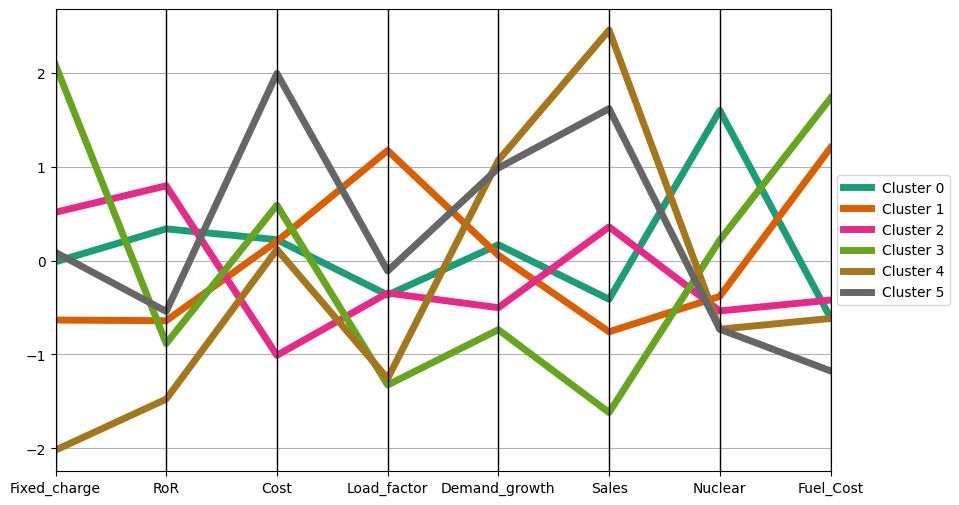

In [48]:
plt.figure(figsize = (10,6))
parallel_coordinates(centroids,class_column='cluster',colormap='Dark2',linewidth = 5)
plt.legend(loc='center left',bbox_to_anchor = (1,0.5))

## 결과 요약
&rightarrow; **Cluster 4의 경우 고정비용 부담률(Fixed_Charge)와 투자 수익률(ROR) 높은 최대 전력 수요량의 증가율(Demand-growth) 그리고 높은 매출액(Sales)를 나타낸다.
또한 Sales와 Fixed_charge가 Cluster 4를 잘 구별해낸다.**

# Elbow Chart 그리기

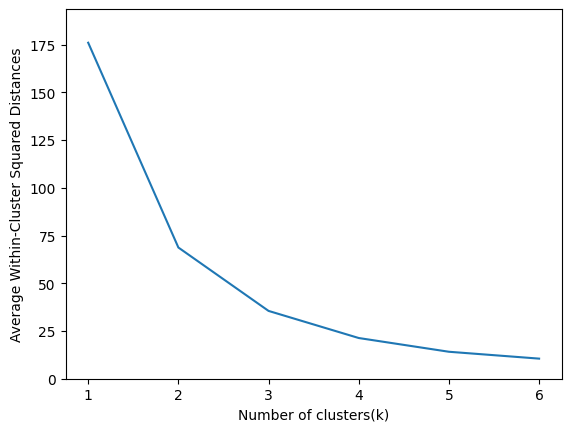

In [49]:
inertia = []
for n_clusters in range(1,7):
    kmeans = KMeans(n_clusters=n_clusters,random_state=0).fit(utilities_df_norm)
    inertia.append(kmeans.inertia_/n_clusters)
inertias = pd.DataFrame({'n_clusters':range(1,7),'inertia':inertia})
ax = inertias.plot(x='n_clusters',y = 'inertia')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0,1.1*inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show()

## 결과 요약
&rightarrow; 유의미하게 감소하는 4를 k로 사용하는 것이 바람직하다.

# 클러스터의 중심간 거리

In [50]:
pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_,metric = 'euclidean'))

,0,1,2,3,4,5
0,0.000000,3.327706,2.767756,4.076778,4.756091,3.814743
1,3.327706,0.000000,3.376575,3.982534,4.831882,4.205250
2,2.767756,3.376575,0.000000,4.240989,4.544657,3.933837
3,4.076778,3.982534,4.240989,0.000000,6.613030,5.511431
4,4.756091,4.831882,4.544657,6.613030,0.000000,3.342656
5,3.814743,4.205250,3.933837,5.511431,3.342656,0.000000
